# Input Format:
### Initial capacity of the three jugs must be enter without any spaces and separated by commas.
### Final state value is the amount of capacity you required such that either of the three jugs must fill with.
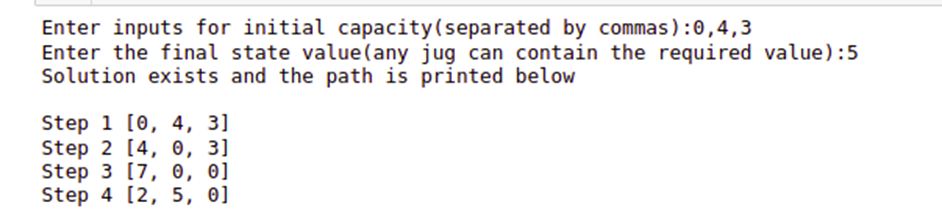

In [1]:
def jugProb(final, stack, isFound, prevData):
    if len(stack) == 0 or final in stack[-1]:
        isFound = True
        return stack
    
    lst = [[0,1], [0,2], [1,0], [1,2], [2,0], [2,1]]
    for i in lst:
        if (isFound):
            return stack
        
        temp = list(stack[-1])
        avl1 = 8 - temp[0]
        avl2 = 5 - temp[1]
        avl3 = 3 - temp[2]

        jug1 = temp[0]
        jug2 = temp[1]
        jug3 = temp[2]
        
        #---------------------------------Into  JUG 1------------------------------------------------
        if (i[1] == 0): #pour into jug1(max capacity is 8)

            if(i[0] == 1): #pour from jug2(max available is 5)
                if(avl1 == 0 or jug2 == 0):
                    continue
                elif avl1 >= jug2:
                    temp[1] = 0 #jug2 is empty
                    temp[0] += jug2 #jug1 water is increased or full
                else:
                    temp[1] = jug2 - avl1 #jug2 is decreased 
                    temp[0] = 8 #jug1 is full
                    
            elif(i[0] == 2): #pour from jug3(max available is 3)
                
                if(avl1 == 0 or jug3 == 0):
                    continue
                elif avl1 >= jug3:
                    temp[2] = 0 #jug3 is empty
                    temp[0] += jug3 #jug1 water is increased or full
                else:
                    temp[2] = jug3 - avl1 #jug3 is decreased 
                    temp[0] = 8 #jug1 is full
                    
        #---------------------------------Into  JUG 2------------------------------------------------
        elif (i[1] == 1): #pour into jug2(max capacity is 5)
            
            if(i[0] == 0): #pour from jug1(max available is 8)
                if(avl2 == 0 or jug1 == 0):
                    continue
                elif avl2 >= jug1:
                    temp[0] = 0 #jug1 is empty
                    temp[1] += jug1 #jug2 water is increased or full
                else:
                    temp[0] = jug1 - avl2 #jug1 is decreased 
                    temp[1] = 5 #jug2 is full
                    
            elif(i[0] == 2): #pour from jug3(max available is 3)
                if(avl2 == 0 or jug3 == 0):
                    continue
                elif avl2 >= jug3:
                    temp[2] = 0 #jug3 is empty
                    temp[1] += jug3 #jug2 water is increased or full
                else:
                    temp[2] = jug3 - avl2 #jug3 is decreased 
                    temp[1] = 5 #jug2 is full
                    
        #---------------------------------Into  JUG 3------------------------------------------------
        elif (i[1] == 2): #pour into jug3(max capacity is 3)
            
            if(i[0] == 0): #pour from jug1(max available is 8)
                if(avl3 == 0 or jug1 == 0):
                    continue
                    
                elif avl3 >= jug1:
                    temp[0] = 0 #jug1 is empty
                    temp[2] += jug1 #jug3 water is increased or full
                else:
                    temp[0] = jug1 - avl3 #jug1 is decreased 
                    temp[2] = 3 #jug3 is full
                
            elif(i[0] == 1): #pour from jug2(max available is 5)
                
                if(avl3 == 0 or jug2 == 0):
                    continue
                elif avl3 >= jug2:
                    temp[1] = 0 #jug2 is empty
                    temp[2] += jug2 #jug3 water is increased or full
                else:
                    temp[1] = jug2 - avl3 #jug2 is decreased 
                    temp[2] = 3 #jug3 is full
        
        if final in temp:
            isFound.append(1)
            stack.append(temp)
            prevData.append(temp)
            return stack
        
        if temp not in prevData:
            prevData.append(temp)
            stack.append(temp)
            jugProb(final, stack, isFound, prevData)
            
    if not isFound:        
        stack.pop()
    return stack
        
cap = [8, 5, 3]
initial = input('Enter inputs for initial capacity(separated by commas):').split(',')
initial = [int(x) for x in initial]
final = int(input('Enter the final state value(any jug can contain the required value):'))
stack = [] 
stack.append(initial)
isFound = []
result = jugProb(final, stack, isFound, list(stack))
if result:
    i = 1
    print('Solution exists and the path is printed below\n')
    for path in result:
        print('Step',i, path)
        i += 1
else:
    print('Solution not exist')


Enter inputs for initial capacity(separated by commas):0,4,3
Enter the final state value(any jug can contain the required value):5
Solution exists and the path is printed below

Step 1 [0, 4, 3]
Step 2 [4, 0, 3]
Step 3 [7, 0, 0]
Step 4 [2, 5, 0]
